# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

- Get images 
- Annotate images 

Albumentations is used for data augmentation

In [2]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

  Using cached labelme-5.6.1.tar.gz (1.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.0/390.3 MB 3.3 MB/s eta 0:01:57
   ---------------------------------------- 1.0/390.3 MB 3.3 MB/s eta 0:01:57
   ---------------------------------------- 2.1/390.3 MB 2.8 MB/s eta 0:02:19
   ---------------------------------------- 2.9/390.3 MB 2.9 MB/s eta 0:02:12
   ---------------------------------------- 3.7/390.3 MB 3.2 MB/s eta 0:02:03
   -------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddlepaddle-gpu 2.6.2 requires protobuf<=3.20.2,>=3.1.0; platform_system == "Windows", but you have protobuf 5.29.3 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1.2 Collect Images Using OpenCV

In [1]:
import os   #To navigate in our labtop 
import time   #Help us to give time for real time detection
import uuid  #To give specific identify for images, more professional!
import cv2  #Help us with computer vision

In [2]:
#We create the folder data and inside it the folder images manually
IMAGES_PATH = os.path.join('data','images')
number_images = 40

In [13]:
cap = cv2.VideoCapture(0)  #Estalishing a connection to the cmera 
#Number might be different so we need to test to get the right one here

for imgnum in range(number_images):     #We will collect the images 
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()  #ret is for weither or not succefully capture the image ()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')  #It  define the name of the folder where we will past iimages 
    cv2.imwrite(imgname, frame)  
    cv2.imshow('frame', frame)
    time.sleep(0.5)  #A little bit of tme too move up to get more images 

    if cv2.waitKey(1) & 0xFF == ord('q'):  #Allow us to break the loop
        break
    
cap.release()
cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe

In [3]:
!labelme
#If everything is well innstalled it will open a pop up 
#We use open to  go to our images and then change the directory where we want to save labbels 
#File -> chnage labe directory 

#Edit -> Draw rectangle and we will annotate all images 

2025-02-22 22:59:20.089 | INFO     | labelme.config:get_config:66 - Loading config file from: C:\Users\khodj\.labelmerc


**Remarques** : 
- We gonna takee a look and we will spit the data on train/valid/test sets 
- Validation partition will help us to fixe hyperparameters 
- Test set to get the performancce 

# 2. Review Dataset and Build Image Loading Function

- Limited memory growth 
- Savve images in the data pipline 
- Visualise images with matplotlib

### 2.1 Import TF and Deps

In [4]:
import tensorflow as tf  #To build data pipeline andd to immplement a memory growth limitation  
import json  #Our labels are on json format 
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [17]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
#It's a good practice 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [20]:
tf.config.list_physical_devices('GPU')

[]

### 2.3 Load Image into TF Data Pipeline

In [5]:
# Everythinng with .jpg in the direectory will be picked too the pipline data 
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = False ) 

In [6]:
#If it doesn't show a path, it means that we didn't downloaded images in the pipline 
images.as_numpy_iterator().next()

b'data\\images\\0cffbc58-e740-11ef-970e-a02942f54cc6.jpg'

In [7]:
def load_image(x): 
    byte_img = tf.io.read_file(x)  #Return a byte coded image 
    img = tf.io.decode_jpeg(byte_img) #Here we get our image back 
    return img

In [8]:
images = images.map(load_image) #We will apply the funnction to every image with map 

In [9]:
images.as_numpy_iterator().next()
#We got our images back !! 

array([[[ 90,  87,  78],
        [ 68,  65,  56],
        [ 94,  93,  88],
        ...,
        [185, 173, 149],
        [185, 173, 149],
        [186, 174, 150]],

       [[ 91,  88,  79],
        [ 73,  73,  63],
        [ 92,  92,  84],
        ...,
        [184, 172, 148],
        [184, 172, 148],
        [184, 172, 148]],

       [[ 88,  88,  76],
        [ 79,  81,  70],
        [ 82,  83,  75],
        ...,
        [184, 172, 150],
        [185, 173, 151],
        [186, 174, 152]],

       ...,

       [[ 35,  39,  38],
        [ 36,  42,  40],
        [ 37,  42,  38],
        ...,
        [255, 254, 241],
        [255, 254, 241],
        [255, 254, 241]],

       [[ 31,  37,  33],
        [ 32,  41,  36],
        [ 35,  41,  37],
        ...,
        [255, 254, 241],
        [255, 254, 241],
        [255, 254, 241]],

       [[ 31,  40,  35],
        [ 33,  42,  37],
        [ 33,  42,  37],
        ...,
        [255, 254, 241],
        [255, 254, 241],
        [255, 254, 241]]

In [10]:
type(images)
#tenserflow.pythoon.data.ops is a data pipline 

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [11]:
image_generator = images.batch(4).as_numpy_iterator()  #To visualise four iages at the same time 

In [12]:
plot_images = image_generator.next()  #To return next batch of data each time 

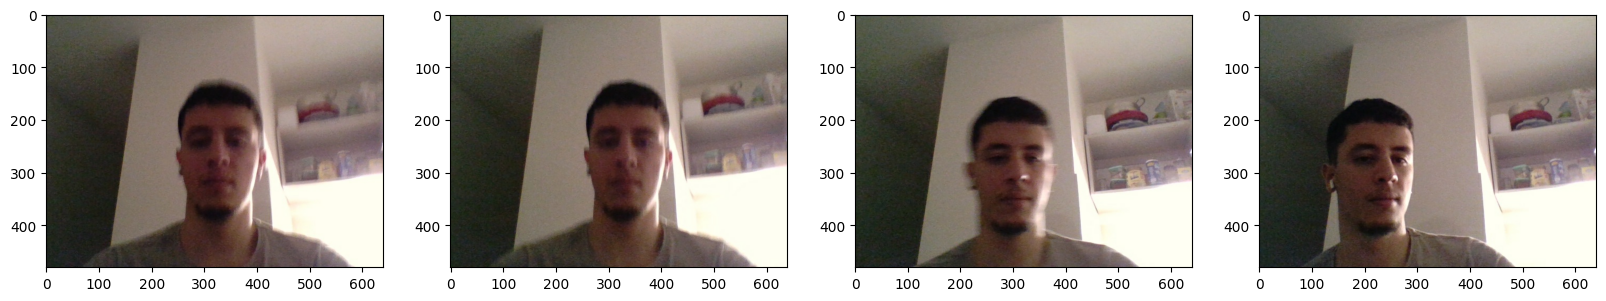

In [13]:
fig, ax =  plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

**We will do it manually**

In [14]:
90*.7 # 64 to train

62.99999999999999

In [15]:
90*.15 # 12 to val and 24 to test

13.5

### 3.2 Move the Matching Labels

We will use the sript  bellow to move on label onn train, test and val automarically

In [16]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [16]:
import albumentations as alb

ERROR:albumentations.check_version:Error fetching version info
Traceback (most recent call last):
  File "c:\Users\khodj\AppData\Local\Programs\Python\Python312\Lib\urllib\request.py", line 1344, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "c:\Users\khodj\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 1319, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "c:\Users\khodj\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 1365, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "c:\Users\khodj\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 1314, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "c:\Users\khodj\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 1074, in _send_output
    self.send(msg)
  File "c:\Users\khodj\AppData\Local\Programs\Python\Python312\Lib\http\client.p

We set the pipline off modification to do

In [29]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

You replace the immage file name whith whatever you have on your repo

In [17]:
img = cv2.imread(os.path.join('data','train', 'images','0cffbc58-e740-11ef-970e-a02942f54cc6.jpg'))

In [18]:
img

array([[[ 79,  88,  91],
        [ 57,  66,  69],
        [ 88,  93,  96],
        ...,
        [149, 172, 187],
        [150, 173, 188],
        [150, 173, 188]],

       [[ 79,  88,  91],
        [ 64,  73,  76],
        [ 84,  91,  94],
        ...,
        [148, 171, 186],
        [150, 171, 186],
        [149, 172, 187]],

       [[ 78,  88,  88],
        [ 70,  80,  80],
        [ 75,  83,  83],
        ...,
        [151, 172, 187],
        [154, 173, 188],
        [152, 173, 188]],

       ...,

       [[ 38,  39,  35],
        [ 40,  41,  37],
        [ 41,  42,  38],
        ...,
        [241, 254, 255],
        [241, 254, 255],
        [241, 254, 255]],

       [[ 36,  38,  32],
        [ 38,  40,  34],
        [ 39,  41,  35],
        ...,
        [241, 254, 255],
        [241, 254, 255],
        [241, 254, 255]],

       [[ 37,  39,  33],
        [ 40,  42,  36],
        [ 39,  41,  35],
        ...,
        [241, 254, 255],
        [241, 254, 255],
        [241, 254, 255]]

In [19]:
with open(os.path.join('data', 'train', 'labels', '0cffbc58-e740-11ef-970e-a02942f54cc6.json'), 'r') as f:
    label = json.load(f)

In [20]:
label

{'version': '5.6.1',
 'flags': {},
 'shapes': [{'label': 'Face',
   'points': [[233.46153846153848, 104.4230769230769],
    [431.53846153846155, 404.4230769230769]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\0cffbc58-e740-11ef-970e-a02942f54cc6.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVY

In [21]:
label['shapes'][0]['points']

[[233.46153846153848, 104.4230769230769],
 [431.53846153846155, 404.4230769230769]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [22]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [23]:
coords

[233.46153846153848, 104.4230769230769, 431.53846153846155, 404.4230769230769]

We normalise coordinate acording to albumentation library doocumentation

In [24]:
coords = list(np.divide(coords, [640,480,640,480]))

In [25]:
coords

[0.36478365384615385,
 0.2175480769230769,
 0.6742788461538461,
 0.8425480769230769]

### 4.4 Apply Augmentations and View Results

In [30]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [31]:
augmented['bboxes'][0][2:]

(0.7211965811965813, 0.8387179487179487)

In [32]:
augmented['bboxes']

[(0.281025641025641,
  0.172051282051282,
  0.7211965811965813,
  0.8387179487179487)]

We trannsformed coordinate for albumentation and now we need to get back original coordinate to draw it

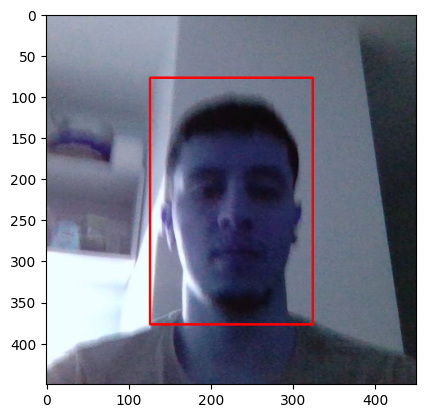

In [33]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

**Image will be blue because opencv read images aas bga while mmatplotlib as rgb, so no pproblems!!!**

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

**We will apply augmentation to all images**

In [37]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.6236263736263736, 0.7300824175824177, 0.40556318681318676, 0.35233516483516486, 'face'].


### 5.2 Load Augmented Images to Tensorflow Dataset

- **We devide by 255 to get values between 0 and 1, so we can apply a sigmoide application at the finale layer of the neral network**
- **It's So important to desactivate shuffle**

In [34]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [35]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [36]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [37]:
train_images.as_numpy_iterator().next()

array([[[0.40030637, 0.4033701 , 0.35477942],
        [0.4310662 , 0.41421568, 0.37095588],
        [0.4240196 , 0.4004902 , 0.35343137],
        ...,
        [0.7723652 , 0.7213848 , 0.6860907 ],
        [0.7541054 , 0.71433824, 0.6753064 ],
        [0.75508577, 0.7112745 , 0.67604166]],

       [[0.39142156, 0.3860907 , 0.34865198],
        [0.41476715, 0.39865196, 0.36464462],
        [0.43284315, 0.40686274, 0.36813724],
        ...,
        [0.7666054 , 0.71023285, 0.6759191 ],
        [0.76164216, 0.7096814 , 0.6745098 ],
        [0.747549  , 0.6965686 , 0.6637255 ]],

       [[0.41390932, 0.39822304, 0.36292893],
        [0.41213235, 0.39693627, 0.36164215],
        [0.41219363, 0.40042892, 0.3651348 ],
        ...,
        [0.7748774 , 0.70821077, 0.6807598 ],
        [0.77003676, 0.71023285, 0.6827819 ],
        [0.7621936 , 0.7033701 , 0.6759191 ]],

       ...,

       [[0.31807598, 0.29846814, 0.28278187],
        [0.313174  , 0.28180146, 0.27003676],
        [0.33431372, 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [38]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [39]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [40]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [41]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [42]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.301 , 0.1876, 0.741 , 0.8545], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [43]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3840, 3840, 1380, 1380, 720, 720)

### 7.2 Create Final Datasets (Images/Labels)

- Shuffle parameter should be bigger then data llength
- Each batch will contain 8 images and 8 labels 

In [44]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [45]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [46]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

We get 8 clases with 8 boxes 

In [47]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.2062 , 0.09296, 0.6333 , 0.64   ],
        [0.5503 , 0.2625 , 0.914  , 0.8096 ],
        [0.     , 0.4092 , 0.4182 , 0.9194 ],
        [0.     , 0.5024 , 0.08044, 1.     ],
        [0.2344 , 0.1458 , 0.6743 , 0.8125 ],
        [0.182  , 0.02567, 0.5605 , 0.641  ],
        [0.338  , 0.4402 , 0.682  , 0.885  ],
        [0.4753 , 0.1582 , 0.7637 , 0.4463 ]], dtype=float16))

### 7.3 View Images and Annotations

We grab onne sample 

In [48]:
data_samples = train.as_numpy_iterator()

Grab also Next batch 

In [49]:
res = data_samples.next()

The np.array is saved as a readonly and CV2 need a modifiable array soo we need to use .copy() methode 

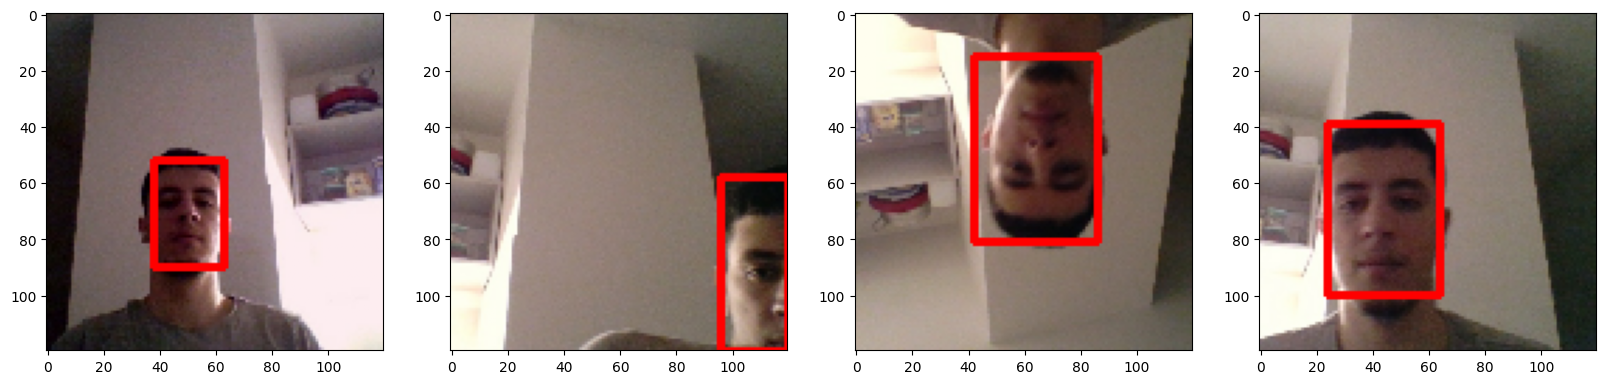

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx].copy()
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

**We finally finish data processing!!, let's goo for some deep learning**

# 8. Build Deep Learning using the Functional API

**Remarks :**
This problem could be devided to two main process : 
- First one is binary classification problem, to determine if there is a face or not.
- Second one is a regression probleme to predicte boxe coordinates. 

keras model expect on input and one output so we will usse the functonnal API to use two loss function, it combines them

### 8.1 Import Layers and Base Network

In [51]:
from tensorflow.keras.models import Model  #Base of what all tensorflow model are built on
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16   #Big bad boy 

**VGG16 is a huge neural network that was built for image classification and it's pretrained as well**

### 8.2 Download VGG16

In [52]:
vgg = VGG16(include_top=False) #We don't need the final layers becose we need to use our own final layers 

In [53]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 8.3 Build instance of Network

For every model we need an input nnd one or multiple output

In [54]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)
 
    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [55]:
facetracker = build_model()

In [56]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
X, y = train.as_numpy_iterator().next()

In [58]:
X.shape

(8, 120, 120, 3)

In [59]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


In [60]:
classes, coords

(array([[0.32372728],
        [0.4517676 ],
        [0.34706327],
        [0.31087378],
        [0.29577163],
        [0.4725322 ],
        [0.42439055],
        [0.40699247]], dtype=float32),
 array([[0.47613454, 0.48773435, 0.27751353, 0.5704531 ],
        [0.51213795, 0.49891096, 0.29317468, 0.5580726 ],
        [0.5303776 , 0.4920722 , 0.32640293, 0.6111452 ],
        [0.4913066 , 0.452507  , 0.31770614, 0.5956766 ],
        [0.508922  , 0.4559141 , 0.26570815, 0.5204326 ],
        [0.5257007 , 0.47647396, 0.30151525, 0.53869873],
        [0.47201407, 0.45774782, 0.25351217, 0.5438018 ],
        [0.49623945, 0.48186573, 0.27759218, 0.5258446 ]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

How to decrease the learning rate after each epoche to not get an overfitting

In [61]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [62]:
# Définition du scheduler de décroissance
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,  
    decay_steps=len(train),  
    decay_rate=lr_decay,
    staircase=True  
)

# Utilisation dans l'optimiseur Adam
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

### 9.2 Create Localization Loss and Classification Loss

In [63]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [64]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [65]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.178065299987793>

In [66]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9841170310974121>

In [67]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.178065299987793>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

Whenever we create the model class we need six important mmethods :
- init : passe initial pparameters 
- compile : We passe the closs, loss and optimazer functions 
- train_step : 
- test_step
- call

In [68]:
#y has a type : tensor 
#In eager execution mode we have acces to its shape
# In eager graphe we don't and it will cause error in trainning  
# We need to execute the next lin to force eager execution mode 
tf.config.run_functions_eagerly(True)

In [69]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch #Take one batch of data and unpack it 
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True) #Make a predictionn at first
            
            #Calcullae losses 
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            #Calculate gradient 
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        #Same as trainn step but we don't use gradient here 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [70]:
x=(1,2,3)
print(len(x))

3


In [71]:
model = FaceTracker(facetracker)

In [72]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [74]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath="model_checkpoint.weights.h5",  # Sauvegarde des poids sous ce nom de fichier
    save_weights_only=True,  # Sauvegarde uniquement les poids (pas l'architecture)
    save_best_only=True,  # Sauvegarde uniquement si la performance s'améliore
    monitor="val_loss",  # Critère pour sauvegarder (ici, la perte sur validation)
    mode="min",  # Sauvegarde si val_loss diminue
    verbose=1  # Affiche un message à chaque sauvegarde
)

In [75]:
logdir='logs'

In [76]:
#Create a tensorboard in the log directory 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train, epochs=12, validation_data=val, callbacks=[tensorboard_callback, checkpoint_callback])
#We can use train.take(x) to  ttrain only en x ammount of data 


Epoch 1/12


480/480 ━━━━━━━━━━━━━━━━━━━━ 319s 660ms/step - class_loss: 0.0928 - regress_loss: 0.3126 - total_loss: 0.3589 - val_class_loss: 0.0344 - val_regress_loss: 0.1795 - val_total_loss: 0.1967
Epoch 2/12


c:\Users\khodj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


480/480 ━━━━━━━━━━━━━━━━━━━━ 317s 656ms/step - class_loss: 0.0234 - regress_loss: 0.1034 - total_loss: 0.1151 - val_class_loss: 8.5068e-04 - val_regress_loss: 0.1204 - val_total_loss: 0.1208
Epoch 3/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 317s 657ms/step - class_loss: 0.0236 - regress_loss: 0.0932 - total_loss: 0.1050 - val_class_loss: 0.0222 - val_regress_loss: 0.1958 - val_total_loss: 0.2069
Epoch 4/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 316s 656ms/step - class_loss: 0.0236 - regress_loss: 0.0932 - total_loss: 0.1050 - val_class_loss: 0.0294 - val_regress_loss: 0.1947 - val_total_loss: 0.2094
Epoch 5/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 317s 657ms/step - class_loss: 0.0236 - regress_loss: 0.0932 - total_loss: 0.1050 - val_class_loss: 2.1992e-04 - val_regress_loss: 0.1106 - val_total_loss: 0.1107
Epoch 6/12
480/480 ━━━━━━━━━━━━━━━━━━━━ 317s 657ms/step - class_loss: 0.0236 - regress_loss: 0.0932 - total_loss: 0.1050 - val_class_loss: 0.0124 - val_regress_loss: 0.1433 - val_total_loss: 0.1495
Epoch 7/12
48

### 10.3 Plot Performance

In [78]:
hist.history

{'class_loss': [0.0011733248829841614,
  0.001588176703080535,
  0.00077451067045331,
  0.006370835937559605,
  0.005039360374212265,
  0.010358525440096855,
  0.006825853604823351,
  0.06218941882252693,
  0.0012822034768760204,
  0.6569122076034546,
  0.0020949826575815678,
  0.041679080575704575],
 'regress_loss': [0.0860133022069931,
  0.05612523853778839,
  0.0736464262008667,
  0.050139956176280975,
  0.05271691083908081,
  0.0795522928237915,
  0.0562494657933712,
  0.1697070598602295,
  0.07975995540618896,
  1.2719895839691162,
  0.0365002304315567,
  0.11555875092744827],
 'total_loss': [0.08659996092319489,
  0.05691932514309883,
  0.07403368502855301,
  0.05332537367939949,
  0.05523659288883209,
  0.0847315564751625,
  0.05966239422559738,
  0.2008017748594284,
  0.08040105551481247,
  1.6004457473754883,
  0.037547722458839417,
  0.1363982856273651],
 'val_class_loss': [0.03438606485724449,
  0.0008506827289238572,
  0.022158170118927956,
  0.029402337968349457,
  0.00021

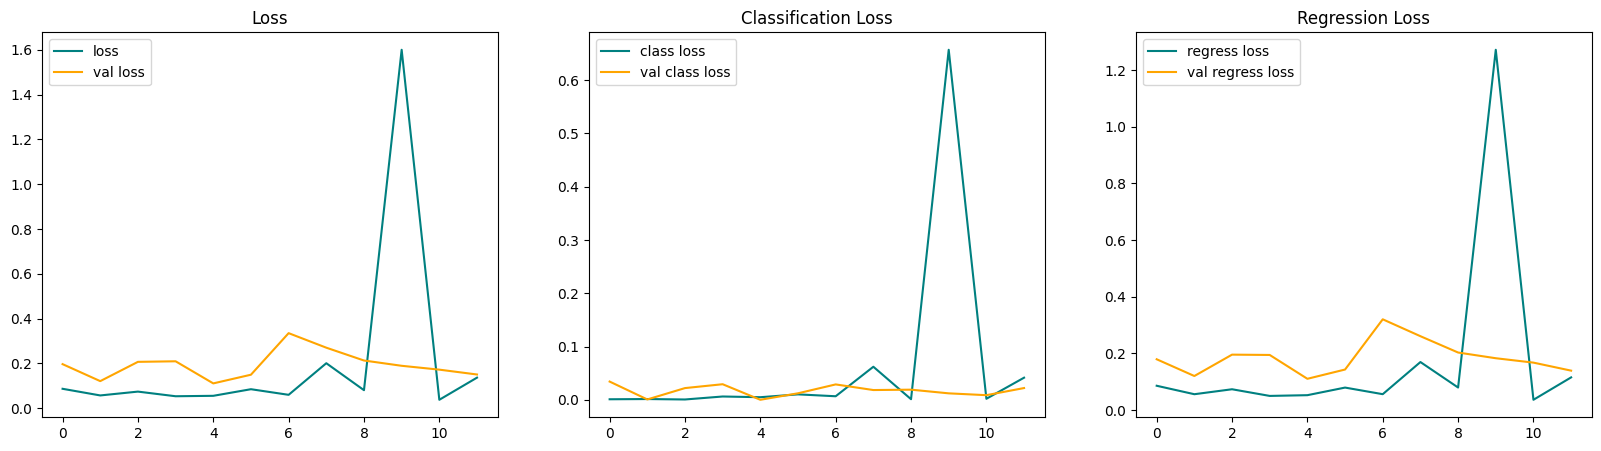

In [79]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [85]:
test_data = test.as_numpy_iterator()

In [86]:
test_sample = test_data.next()

In [87]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


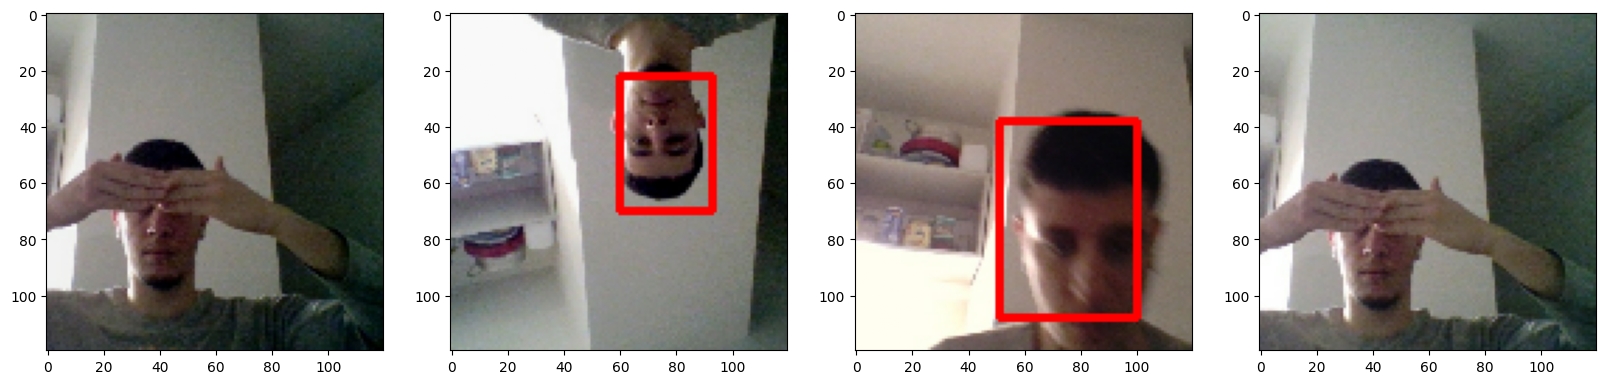

In [88]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx].copy()
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [89]:
from tensorflow.keras.models import load_model

In [90]:
facetracker.save('facetracker.h5')

In [91]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [95]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    #We capture the video frame
    frame = frame[50:500, 50:500,:]
    
    #We convert colors becuse tensorflow work with gbr not egb 
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    #Prediction by the model 
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

### 12.Conclusion 

The project successfully implements a face detection system using TensorFlow and OpenCV. It covers the essential steps, from data acquisition and annotation to model training and real-time detection. By leveraging deep learning and computer vision techniques, the system can effectively recognize and detect faces in real-time.

Future improvements could include:

- Enhancing model accuracy with more diverse training data.
- Optimizing performance for real-time applications on edge devices.
- Extending functionality to include face recognition or emotion detection.

This project serves as a solid foundation for anyone interested in exploring AI-based face detection systems.